# 군집 알고리즘
* 비지도 학습과 군집 알고리즘에 대한 이해
* 흑백 사진에서 과일을 분류하는 실습을 통해 군집 알고리즘 학습

### 지난 시간에

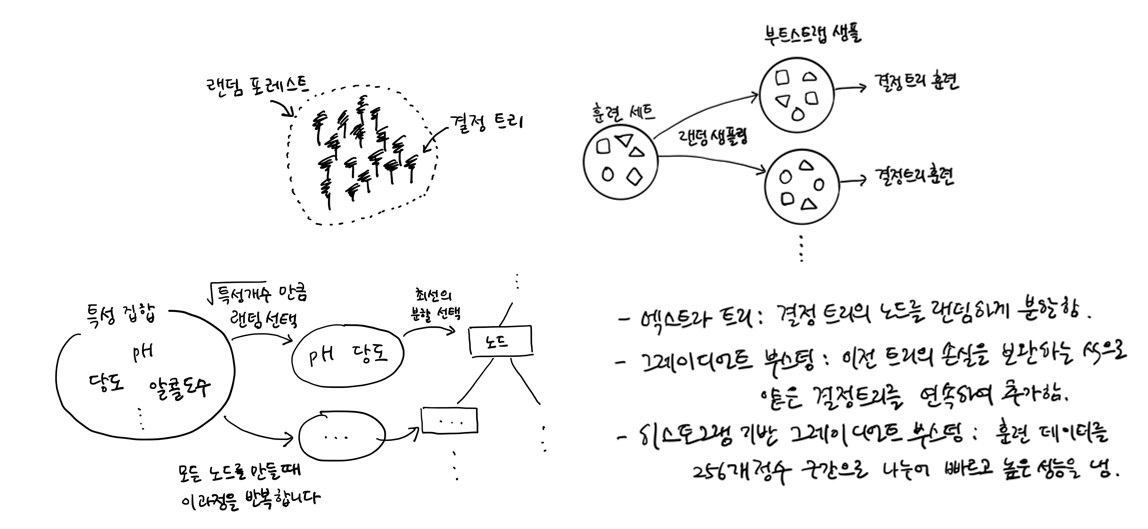

---

### 타깃을 모르는 비지도 학습(Unsupervised Learning)

* 고객이 한빛 마켓에서 사고 싶은 과일 사진을 보내면 그 중 가장 많이 요청하는 과일을 판매 품목으로 선정
* 1위로 선정된 과일 사진을 보낸 고객 중 몇 명을 뽑아 이벤트 당첨자로 선정

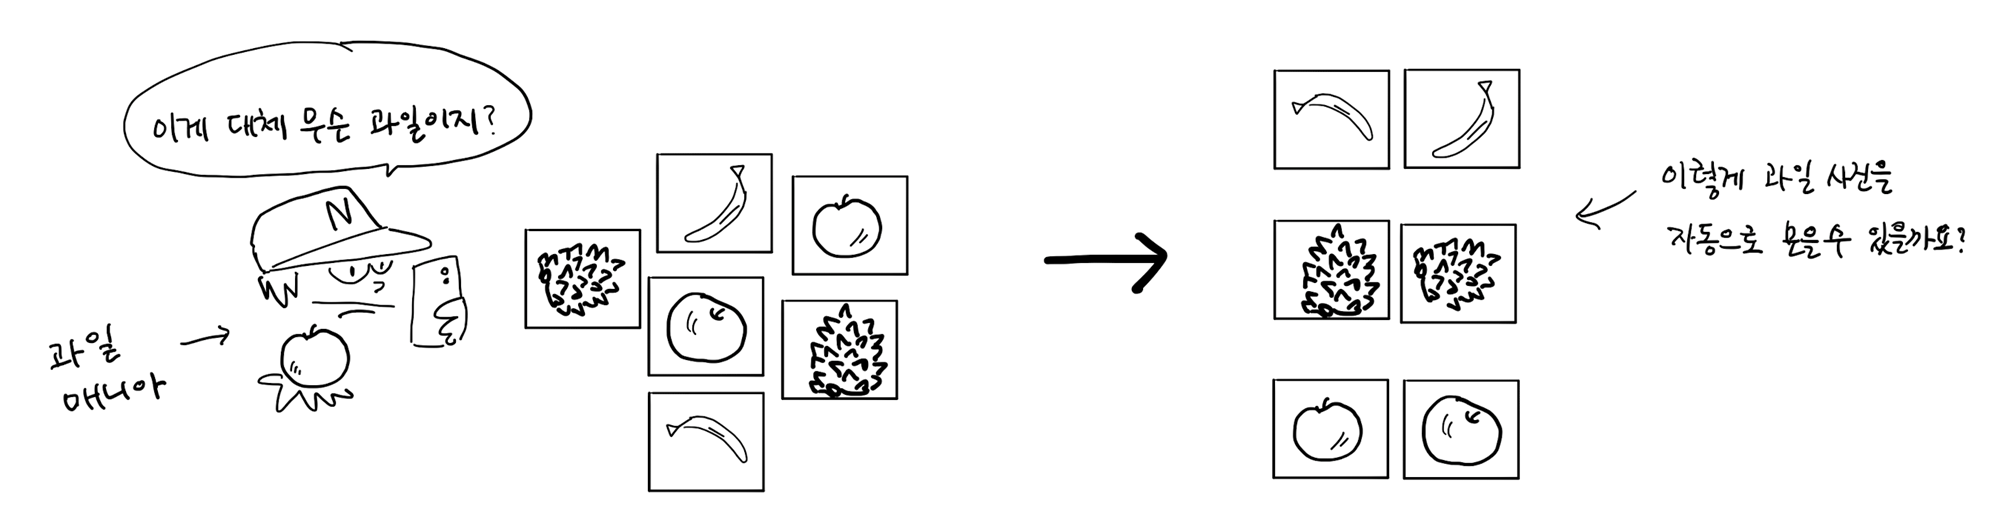

#### [이전 문제와의 차이점]
* 사진에 대한 **정답(타깃)을 알지 못하는 상태**에서 같은 종류의 사진을 **종류대로 분류**해야 함

| 지도 학습(Supervised Learning) | 비지도 학습(Unsupervised Learning) |
| -------------------------- | ----------------------------- |
| 정답(label)이 있는 데이터 사용       | 정답(label) 없이 데이터만 사용          |
| 예: 이메일이 스팸인지 아닌지           | 예: 이메일들을 유형별로 분류              |
| 목표: 예측/분류                  | 목표: 구조/패턴 발견                  |


* 데이터 안에 숨어 있는 "패턴", "구조", "유사성"을 찾는 과정
* 실습을 위해 과일 사진에서 유사성을 찾기 위한 요소 선정
  - **사진의 픽셀값**을 모두 평균 내면 비슷한 과일끼리 모이지 않을까?

### 과일 사진 데이터 준비하기
* 사과, 바나나, 파인애플을 담고 있는 흑백 사진 300장
  - 캐글에 공개된 데이터셋 (https://www.kaggle.com/moltean/fruits)
* 넘파이 배열의 기본 저장 포맷인 npy 파일로 저장되어 있음
  - 첫 번째 차원 : 샘플의 개수 (300)
  - 두 번째 차원 : 이미지 높이 (100)
  - 세 번째 차원 : 이미지 너비 (100)

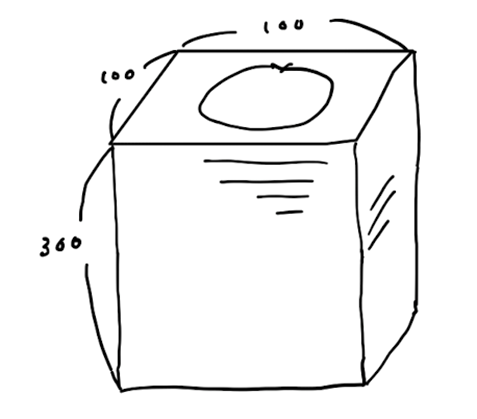

* 사진 데이터 다운로드 및 넘파이 배열 저장

In [50]:
!pip install wget

In [58]:
# Jupyter에서는 오류발생
# !wget https://bit.ly/fruits_300_data -O fruits_300.npy

In [60]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300_data') # npy 파일 로드하여 넘파이 배얼 변수 생성
fruits.shape # 배열 크기 확인

(300, 100, 100)

* 첫 번째 이미지의 첫 번째 행 출력

In [62]:
# 각 픽셀의 흑백 이미지 정보 저장(0 ~ 255)
fruits[0, 0, :]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

* 넘파이 배열로 저장된 이미지를 화면에 그리기
  - matplotlib.pyplot.imshow() 함수 사용 (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

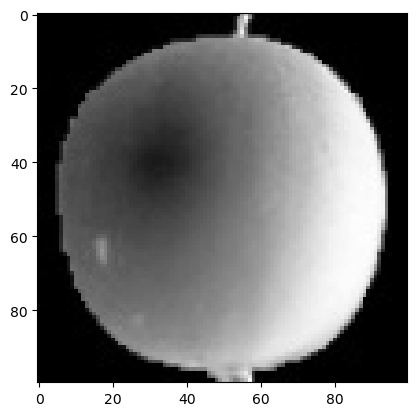

In [64]:
plt.imshow(fruits[0], cmap='gray') # 흑백 이미지 출력 (cmap='gray')
plt.show()

* 흰색 바탕은 중요한 정보가 아니라 **음영이 들어간 과일 몸통 부분이 중요한 정보**
* 흑백 이미지 정수값을 **반전하여 저장**함으로써 컴퓨터에서 **큰 숫자에 집중하여 연산 수행**하도록 함
  - 원본 : 0 - 검은색, 255 - 흰색
  - **반전 : 0 - 흰색, 255 - 검은색**
* 이미지의 픽셀 정보를 반전하여 저장하는 경우가 많음

| 이유      | 설명                         |
| ------- | -------------------------- |
| 센서 특성   | 밝기와 전압 간의 관계로 인해 반전 필요     |
| 산업 표준   | OCR, 의료 영상 등에서의 해석 기준      |
| 압축 효율   | 밝은 배경이 압축에 유리함             |
| 역사/관례   | 흑백 디스플레이, 소프트웨어 처리 방식      |
| 알고리즘 호환 | 엣지 검출, 이진화 등에 더 적합하게 하기 위해 |


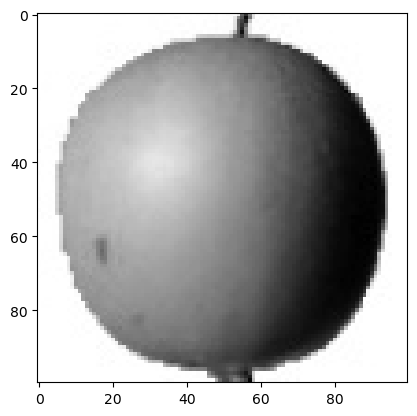

In [66]:
plt.imshow(fruits[0], cmap='gray_r') # 반전 흑백 이미지 출력 (cmap='gray_r')
plt.show()

* 바나나와 파인애플 이미지 출력 확인

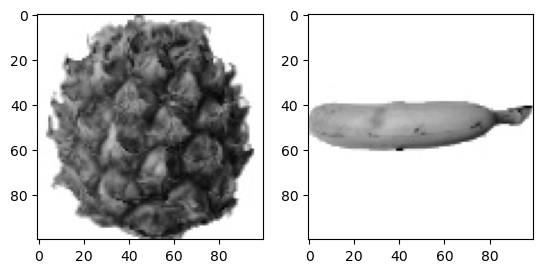

In [68]:
fig, axs = plt.subplots(1, 2) # 그림 영역을 1행 2열로 나눔
axs[0].imshow(fruits[100], cmap='gray_r') # 1행 1열에 fruits 배열의 101번째 이미지 반전 출력
axs[1].imshow(fruits[200], cmap='gray_r') # 1행 2열에 fruits 배열의 201번째 이미지 반전 출력

### 픽셀값 분석하기

* fruits 데이터를 사과, 파인애플, 바나나로 분리
  - 각 이미지 픽셀의 2차원 배열을 1차원 배열로 변환

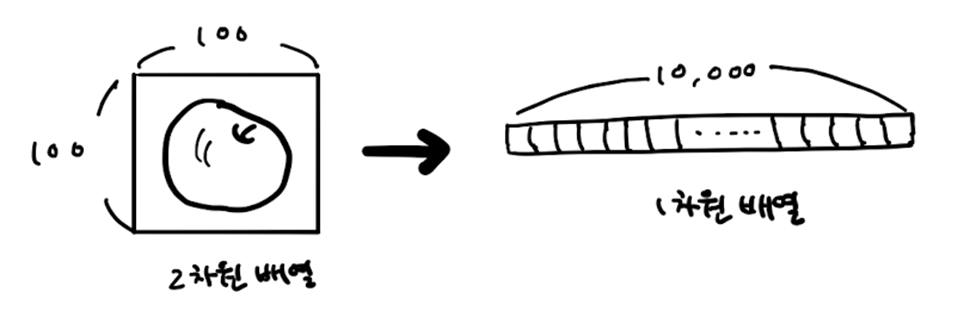

In [70]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

* 과일사진(사과) 배열의 크기 확인

In [72]:
apple.shape

(100, 10000)

* 과일사진(사과) 배열에 들어있는 샘플의 픽셀 평균값 계산

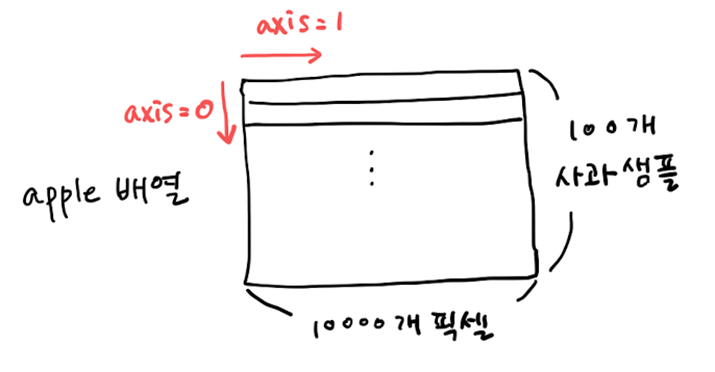

In [74]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

* 히스토그램을 이용해 각 과일사진의 픽셀 평균값의 분포 확인

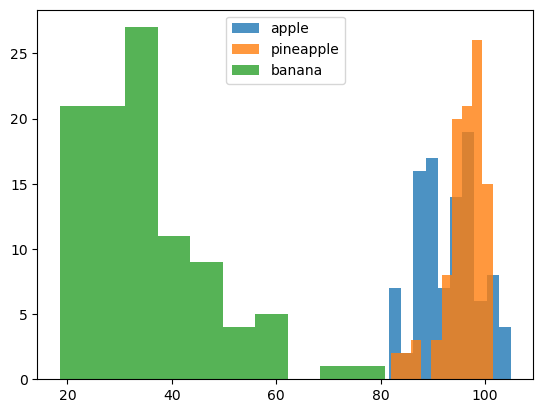

In [78]:
plt.hist(np.mean(apple, axis =1), alpha=0.8)
plt.hist(np.mean(pineapple, axis =1), alpha=0.8)
plt.hist(np.mean(banana, axis =1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

* 샘플별 픽셀 평균값이 아닌 전체 샘플에 대해 픽셀별 평균값을 계산하여 비교

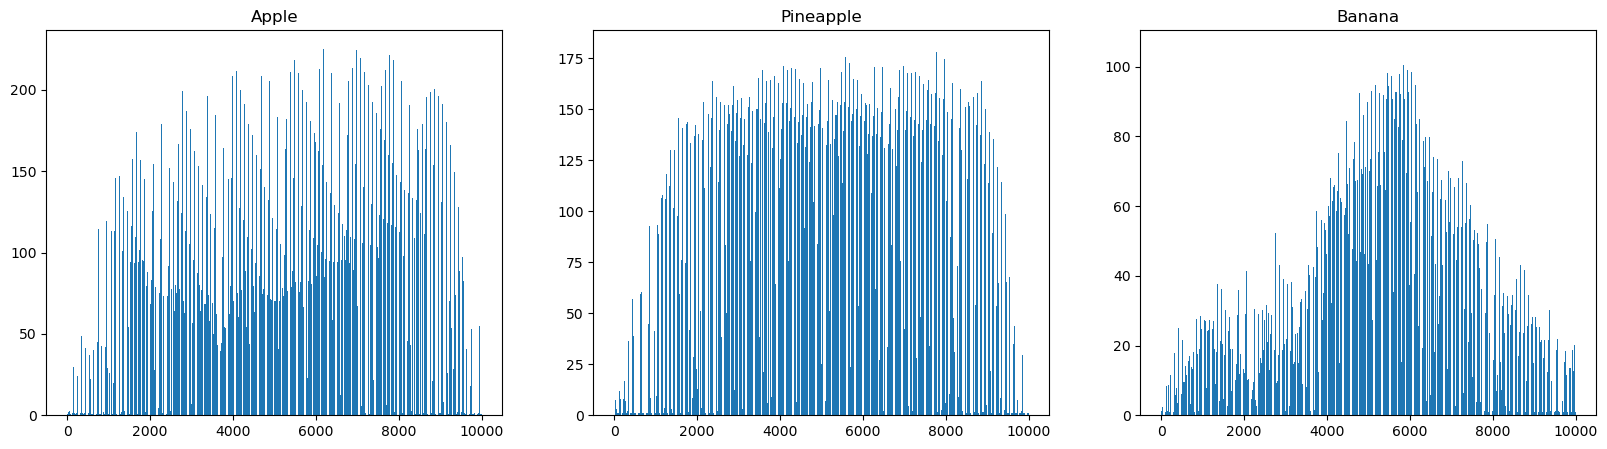

In [94]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))

axs[0].set_title('Apple')
axs[1].set_title('Pineapple')
axs[2].set_title('Banana')

plt.show()

# 사과 : 사진 아래쪽으로 갈수록 값이 높아지는 현상
# 파인애플 : 골고루 값이 분포
# 바나나 : 중앙이 픽셀값이 높음

* 다시 이미지 형태로 배열을 변경(100x100)하여 화면에 출력

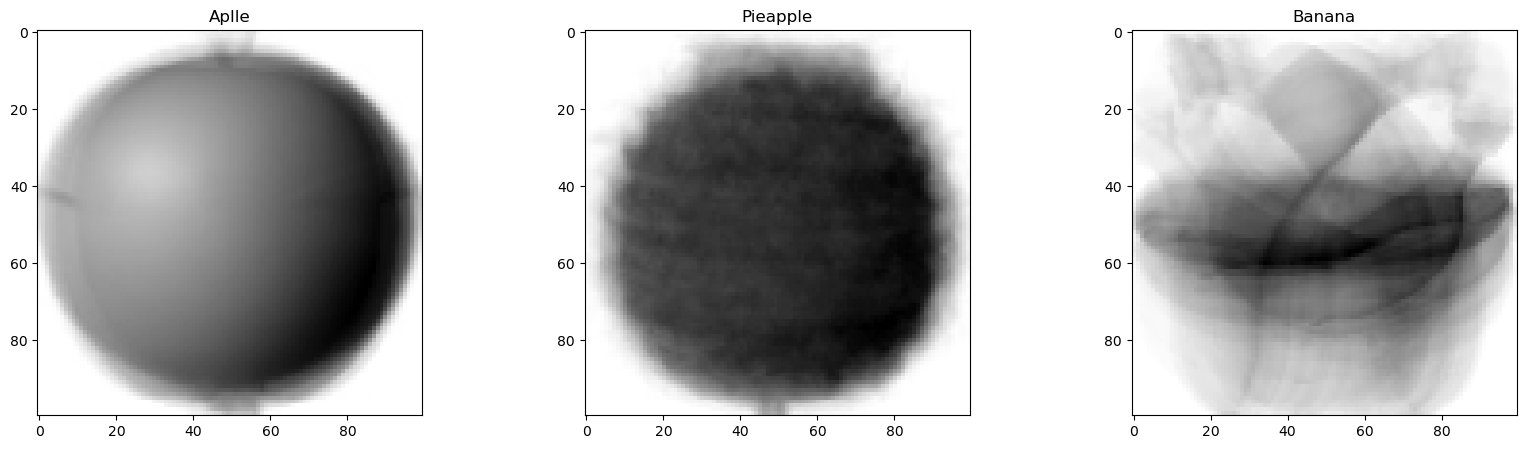

In [91]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis =0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig,axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

axs[0].set_title('Aplle')
axs[1].set_title('Pieapple')
axs[2].set_title('Banana')

plt.show()

### 평균값과 가까운 사진 고르기

* fruits 배열에 있는 모든 샘플에서 각 과일 사진의 평균값(apple_mean, pineapple_mean, banana_mean)을 뺀 절대값의 평균 계산

In [121]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


* 계산된 값 중 가장 작은 값 100개를 추출

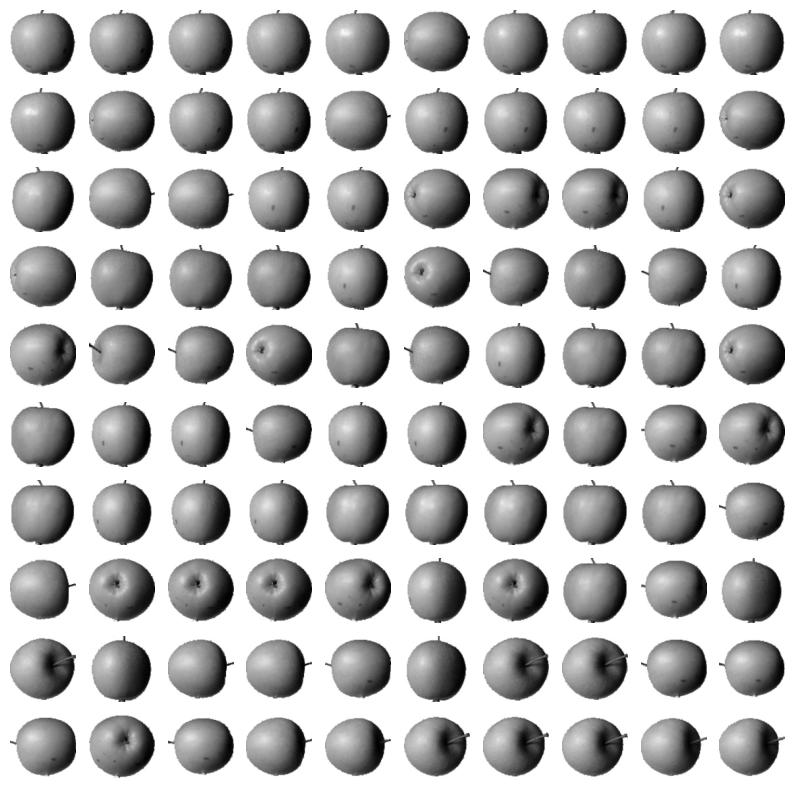

In [102]:
apple_index = np.argsort(abs_mean)[:100] # abs_mean 배열의 값을 오름차순으로 정렬한 인덱스 반환

fig, axs = plt.subplots(10, 10, figsize=(10,10)) # 10 x10 의 그림 영역 생성

# 300개 중 처음 100개의 샘플을 선택해 10x10 격자에 이미지 출력
for i in range(10): # 가로 10개
    for j in range(10): # 세로 10개
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off') # 죄표측 off
plt.show()

### 확인문제
* 바나나 사진의 평균 banana_mean과 비슷한 사진 100장을 찾아 출력

(300,)


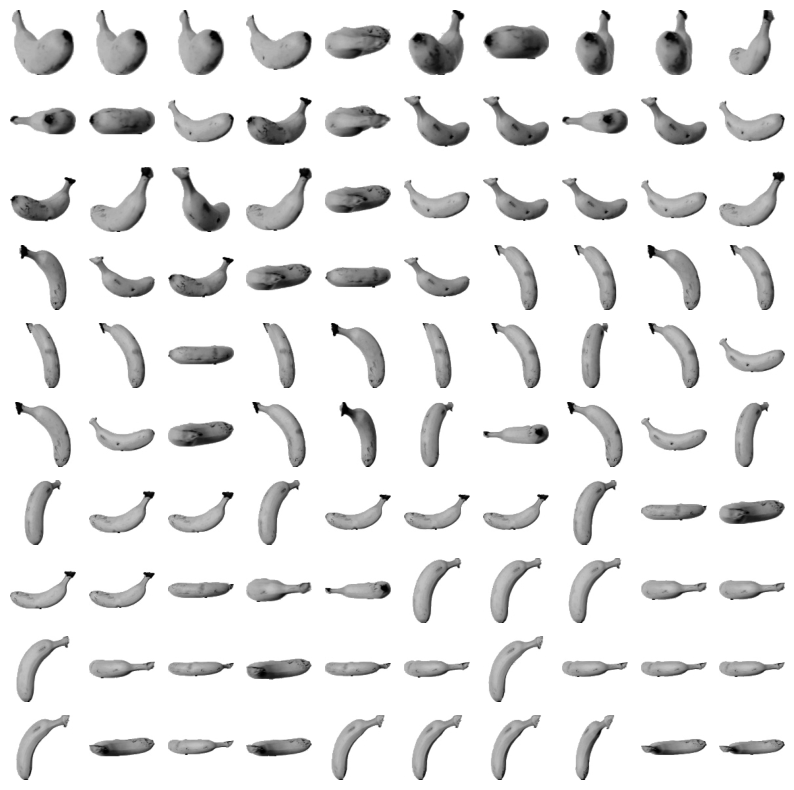

In [123]:
abs_diff = np.abs(fruits-banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2)) # 각 샘플에 대한 평균 계산(두번째, 세번쨰 차원 축소)

banana_index = np.argsort(abs_mean)[200:300] # abs_mean 배열의 값을 오름차순으로 정렬한 인덱스 반환
fig, axs = plt.subplots(10, 10, figsize=(10,10)) 
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

#### [위의 해결 방식 문제점은?]
* 실제 비지도 학습에서는 타깃값을 모르기 때문에 **샘플의 평균값을 미리 구할 수 없음**
* **타깃값을 모르는 상태**에서 세 과일의 평균값을 찾아야 함

---
### 군집(clustering) 알고리즘
* 데이터를 분석할 때 **비슷한 속성을 가진 데이터끼리 그룹을 묶는** 작업
* 군집 알고리즘에서 만들어진 각 그룹을 **클러스터(cluster)** 라고 부름
* 지도 학습과 달리 **정답(label)** 이 없음
* 머신러닝 알고리즘이 **스스로 데이터를 살펴보고 유사도에 따라 그룹을 나눔**

#### [군집 알고리즘의 핵심 목적]
* **데이터의 구조 파악** : 데이터가 어떤 특징을 중심으로 자연스럽게 모이는지 파악
* **패턴 탐색** : 숨겨진 유사성, 관계, 경향성 등을 발견
* **차원 축소 및 사전처리** : 분류나 예측 전에 데이터를 정리하는 단계로 사용 가능

#### [대표적인 군집 알고리즘]
##### **1.K-평균 (K-Means)**
* **가장 널리 쓰이는 군집화 알고리즘**
* 사용자가 클러스터 개수 K를 정하면, 알고리즘이 K개의 중심을 기준으로 데이터 분류
* 반복적으로 중심을 업데이트하면서 클러스터가 정제됨
* **장점**
  - 빠르고 간단
  - 대용량 데이터 처리에 유리
* **단점**
  - K를 미리 알아야 함
  - 원형에 가까운 클러스만 잘 분류

##### **2. 계층적 군집화 (Hierarchical Clustering)**
* 데이터를 **트리 구조(dendrogram)** 로 병합하거나 분할하는 방식
* 대표 방식: Agglomerative (bottom-up), Divisive (top-down)
* **장점**
  - K를 미리 정하지 않아도 됨
  - 시각화로 해석이 쉬움
* **단점**
  - 계산 비용이 큼 (대규모 데이터에 부적합)
  - 병합/분할 결정은 되돌릴 수 없음

##### **3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
* 밀도 기반 군집화
* 데이터의 밀도에 따라 클러스터를 형성하고 **이상치(outlier)** 를 구분함
* **장점**
  - 클러스터 개수를 정하지 않아도 됨
  - 다양한 모양의 클러스터 인식 가능
  - 노이즈/이상치 탐지 가능
* **단점**
  - 밀도 임계값(epsilon) 설정이 어려움
  - 고차원 데이터에서는 성능 저하
##### **4. Mean Shift**
* 데이터의 밀집 영역(모드)을 중심으로 클러스터 형성
* 클러스터 수 자동 결정
* **장점**
  - 클러스터 수 자동 추정
  - 군집의 중심이 유연하게 움직임
** **단점**
  - 계산량이 많음
  - 대규모 데이터에 비효율적

##### **5. Gaussian Mixture Model (GMM)**
* 각 클러스터를 **가우시안 분포(정규분포)** 로 가정
* K-평균과 달리 데이터가 클러스터에 속할 확률로 계산됨
* **장점**
  - 부드러운 클러스터링 가능 (확률 기반)
  - 복잡한 분포에 유리
* **단점**
  - 초기 설정 민감
  - 정규분포 가정이 맞지 않으면 성능 저하
 
#### [알고리즘 선택 기준]

| 고려 요소             | 추천 알고리즘            |
| ----------------- | ------------------ |
| 클러스터 수를 모를 때      | DBSCAN, Mean Shift |
| 데이터가 원형/균일할 때     | K-Means            |
| 계층 관계 파악이 중요할 때   | Hierarchical       |
| 노이즈가 많을 때         | DBSCAN             |
| 확률 기반의 유연성이 필요할 때 | GMM                |

#### [활용사례]

| 분야     | 적용 예시                 |
| ------ | --------------------- |
| 마케팅    | 고객 세분화 (고객 행동 기반 그룹화) |
| 이미지 처리 | 색상 군집화, 물체 분할         |
| 텍스트 분석 | 뉴스 기사 분류, 토픽 모델링 전처리  |
| 생명과학   | 유전자 발현 패턴 군집화         |
| 추천 시스템 | 사용자 유형별 추천 그룹 설정      |
